## Data Exploration

##### Step 1: Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [18]:
os.makedirs("results", exist_ok=True)


In [19]:
# Size of figurers

plt.rcParams["figure.figsize"]=(7,4)
plt.rcParams["axes.grid"]=True

#### Step 2:Load the dataset

👉 Suppose you have a dataset like twitter_depression.csv with columns:

text → tweet/post text

label → 1 = depressed, 0 = not depressed

In [20]:
Data_Path=r"C:\Users\kushagra\Desktop\CSAI\Depression_Detection_Model\data\raw\Depression_dataset.csv"


In [21]:
df=pd.read_csv(Data_Path,low_memory=False)
print("raw_shape:",df.shape)
df.head()

raw_shape: (20000, 11)


,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


### Keep only what we  need

In [22]:
# we will only use text and label
df = df[["post_text", "label"]].dropna().reset_index(drop=True)
print("Rows after cleanup:", df.shape)
df.head()


Rows after cleanup: (20000, 2)


,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [23]:
df['label'].value_counts()

label
1    10000
0    10000
Name: count, dtype: int64

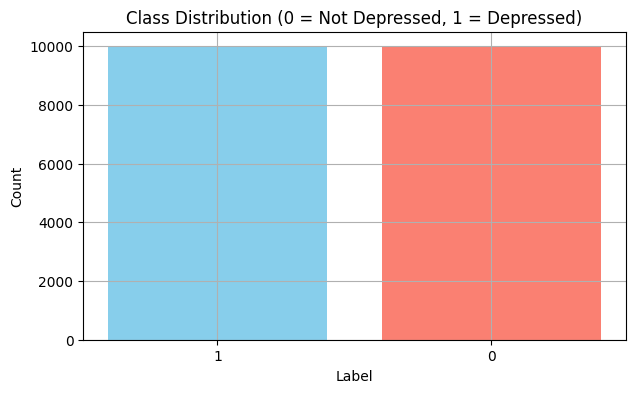

In [24]:
# Bar chart
counts = df['label'].value_counts()
plt.bar(counts.index.astype(str), counts.values, color=['skyblue', 'salmon'])
plt.title("Class Distribution (0 = Not Depressed, 1 = Depressed)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [25]:
df.dtypes

post_text    object
label         int64
dtype: object

In [26]:
labels=sorted(df["label"].unique())

In [27]:
labels

[np.int64(0), np.int64(1)]

In [28]:
assert set(labels) <= {0, 1}, "Labels must be 0/1"


In [29]:
print("\nNulls per column:\n", df.isnull().sum())



Nulls per column:
 post_text    0
label        0
dtype: int64


In [30]:
# We’ll use just the text and the labe

# Drop rows with missing text/label (if any)
df = df.dropna()
print("After column selection & NA drop:", df.shape)
df.head()



After column selection & NA drop: (20000, 2)


,post_text,label
0,It's just over 2 years since I was diagnosed w...,1
1,"It's Sunday, I need a break, so I'm planning t...",1
2,Awake but tired. I need to sleep but my brain ...,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,1
4,It’s hard to say whether packing lists are mak...,1


In [31]:
df.dtypes

post_text    object
label         int64
dtype: object

Counts:
 label
0    10000
1    10000
Name: count, dtype: int64 

Percentages:
 label
0    50.0
1    50.0
Name: count, dtype: float64


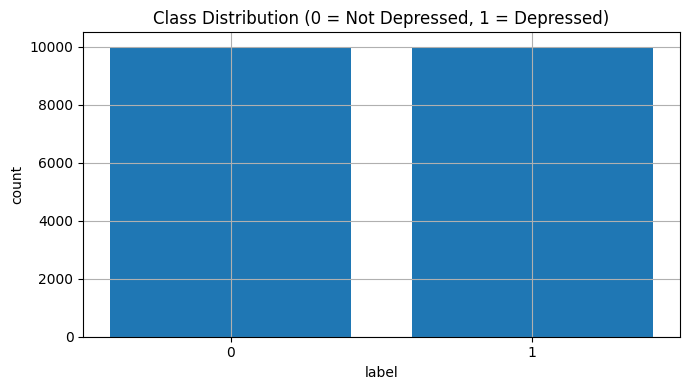

In [32]:
counts = df["label"].value_counts().sort_index()
perc = (counts / counts.sum() * 100).round(2)
print("Counts:\n", counts, "\n\nPercentages:\n", perc)

# Bar plot (matplotlib only)
plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Class Distribution (0 = Not Depressed, 1 = Depressed)")
plt.xlabel("label")
plt.ylabel("count")
plt.tight_layout()
plt.savefig("results/class_distribution.png", dpi=150)
plt.show()


In [34]:
import os
os.makedirs("data/processed",exist_ok=True)

In [37]:
df.to_csv("data/processed/twitter_depression_eda_snapshot.csv", index=False)
print("Saved cleaned snapshot to data/processed/twitter_depression_eda_snapshot.csv")


Saved cleaned snapshot to data/processed/twitter_depression_eda_snapshot.csv
